Author: Tashay Green in collaboration with Jordan Vani and Francis Ko

This is an investigation into CitiBike usage data. 

In [8]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import datetime as dt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Idea: 
The purchasing of 24-Hour Passes is much higher on weekends (Sat-Sun) than during the weekdays.

# Null Hypothesis:
Ho: 24-Hour Passes are purchased in equal or lesser amounts on weekends (Sat-Sun) as on weekdays (Mon-Fri).

# Alternate Hypothesis: 
Ha: More 24-Hour Passes are purchased on weekends (Sat-Sun) than weekdays (Mon-Fri).

# Confidence Level: p = 0.05

In [2]:
# Importing CitiBike April 2016 - June 2016 Rider and Membership Usage Data. 
df = pd.read_csv('CitiBikeUsageData.csv')
df.head()

,Date,Trips over the past 24-hours (midnight to 11:59pm),Cumulative trips (since launch):,Miles traveled today (midnight to 11:59 pm),Miles traveled to date:,Total Annual Members (All Time),24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm),7-Day Passes Purchased (midnight to 11:59 pm)
0,4/1/16,34448,26384204,67595,48286873,163963,1113,0,82
1,4/2/16,21838,26406042,46206,48333079,164031,1193,0,63
2,4/3/16,15321,26421363,28615,48361694,164102,448,0,31
3,4/4/16,12302,26433665,20143,48381837,164167,49,0,19
4,4/5/16,26236,26459901,43723,48425560,164237,341,0,56


In [3]:
df.drop(df.columns[[1,2,3,4,5,7,8]], axis =1, inplace = True)
df.head()

,Date,24-Hour Passes Purchased (midnight to 11:59 pm)
0,4/1/16,1113
1,4/2/16,1193
2,4/3/16,448
3,4/4/16,49
4,4/5/16,341


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,24-Hour Passes Purchased (midnight to 11:59 pm)
0,2016-04-01,1113
1,2016-04-02,1193
2,2016-04-03,448
3,2016-04-04,49
4,2016-04-05,341


In [5]:
df1 = df.copy()
df1['Days'] = df[['Date']].apply(lambda x: dt.datetime.strftime(x['Date'], '%A'), axis=1)
df1.head()

,Date,24-Hour Passes Purchased (midnight to 11:59 pm),Days
0,2016-04-01,1113,Friday
1,2016-04-02,1193,Saturday
2,2016-04-03,448,Sunday
3,2016-04-04,49,Monday
4,2016-04-05,341,Tuesday


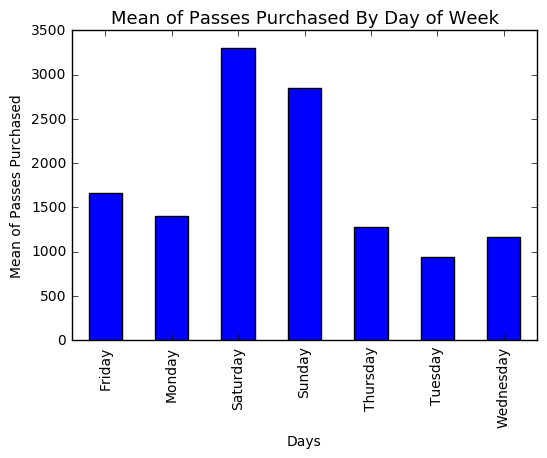

In [13]:
df1.groupby(['Days'])['24-Hour Passes Purchased (midnight to 11:59 pm)'].mean().plot(kind='bar')
pl.title('Mean of Passes Purchased By Day of Week', fontsize=13)
pl.ylabel('Mean of Passes Purchased')
pl.xlabel('Days')

### Figure 1: Mean of 24-Hour Passes Purchased By Day of Week